In [20]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [4]:
# Loading dataset
iris = load_iris()
X = iris.data
y = iris.target
print("Dataset loaded successfully.")
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Dataset loaded successfully.
Features shape: (150, 4)
Target shape: (150,)


Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Pair Plot:


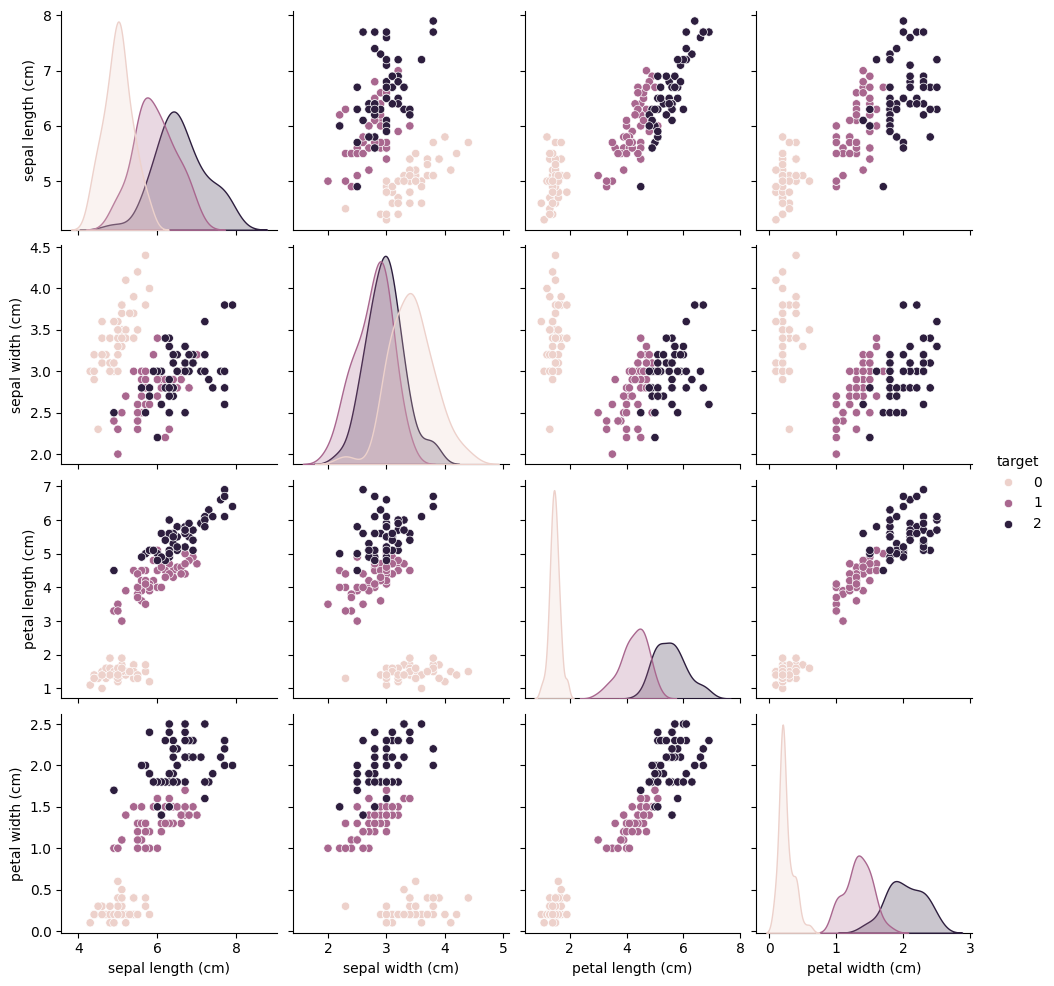


Correlation Heatmap:


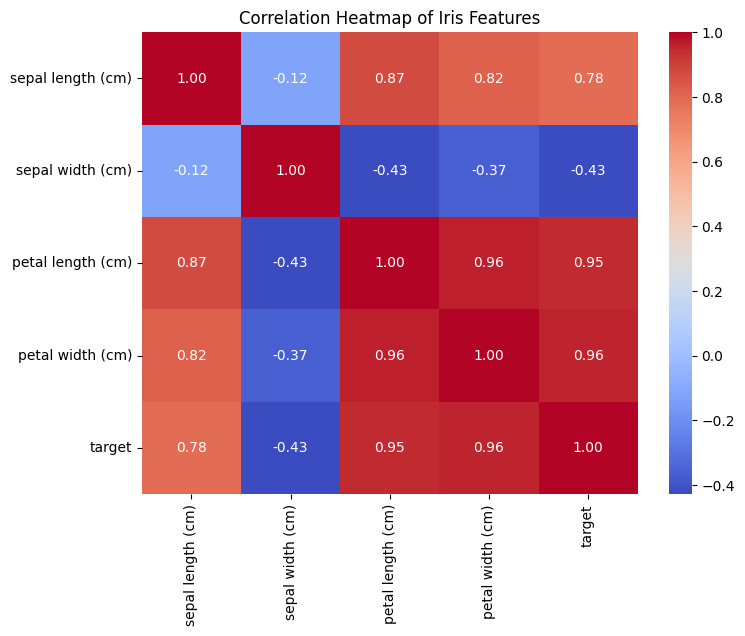


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
#Exploratory Data Analysis
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print("Summary Statistics:")
display(iris_df.describe())
print("\nPair Plot:")
sns.pairplot(iris_df, hue='target')
plt.show()
print("\nCorrelation Heatmap:")
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()
print("\nMissing Values:")
print(iris_df.isnull().sum())

In [6]:
#Preprocessing
X = iris_df.drop('target', axis=1)
y = iris_df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Data preprocessing complete.")
print("Scaled features shape:", X_scaled.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Data preprocessing complete.
Scaled features shape: (150, 4)
Training features shape: (120, 4)
Testing features shape: (30, 4)
Training labels shape: (120,)
Testing labels shape: (30,)


In [8]:
#Model Training and Evaluation
#1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Random Forest Classifier Model:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)
print("\nClassification Report:")
print(class_report)

Random Forest Classifier Model:
Accuracy: 1.0000

Confusion Matrix:


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
#2. Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

Support Vector Machine (SVM) Model:
Accuracy: 0.9667

Confusion Matrix:


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [13]:
#3. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_lr)
print("\nClassification Report:")
print(class_report_lr)

Logistic Regression Model:
Accuracy: 1.0000

Confusion Matrix:


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
#4. K-Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)

K-Nearest Neighbors (KNN) Model:
Accuracy: 1.0000

Confusion Matrix:


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
#5. XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Model:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

XGBoost Model:
Accuracy: 1.0000

Confusion Matrix:


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/tmp/ipython-input-3564660157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


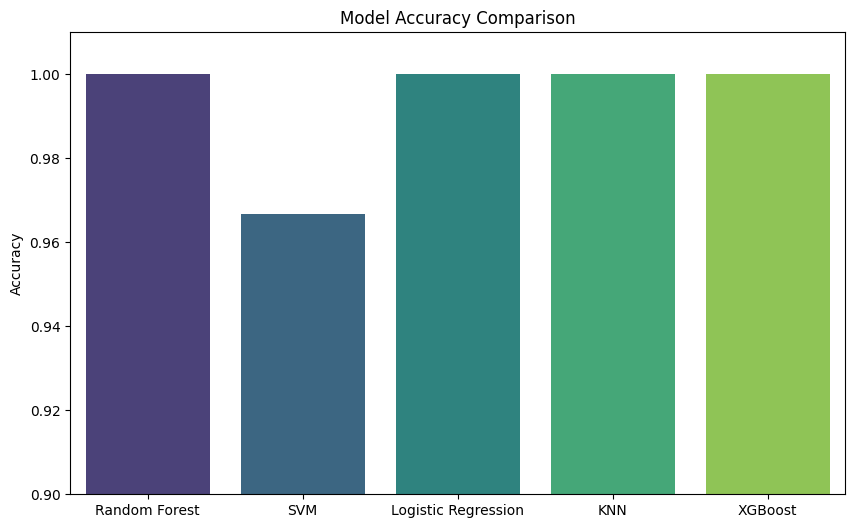

In [18]:
#Model Comparison
model_accuracies = {
    'Random Forest': accuracy,
    'SVM': accuracy_svm,
    'Logistic Regression': accuracy_lr,
    'KNN': accuracy_knn,
    'XGBoost': accuracy_xgb
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.01)
plt.show()


Pair Plot with Random Forest Predictions:


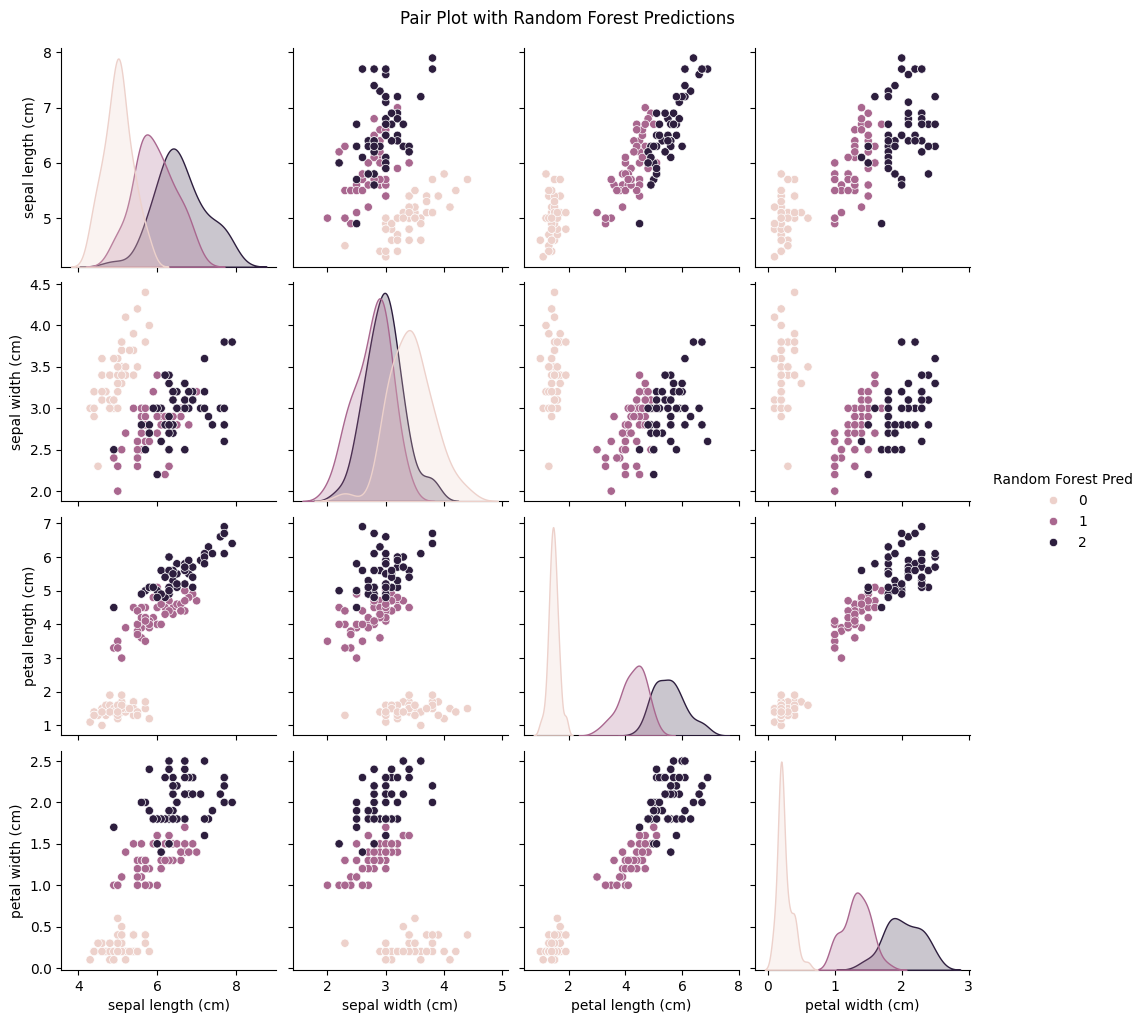


Pair Plot with SVM Predictions:


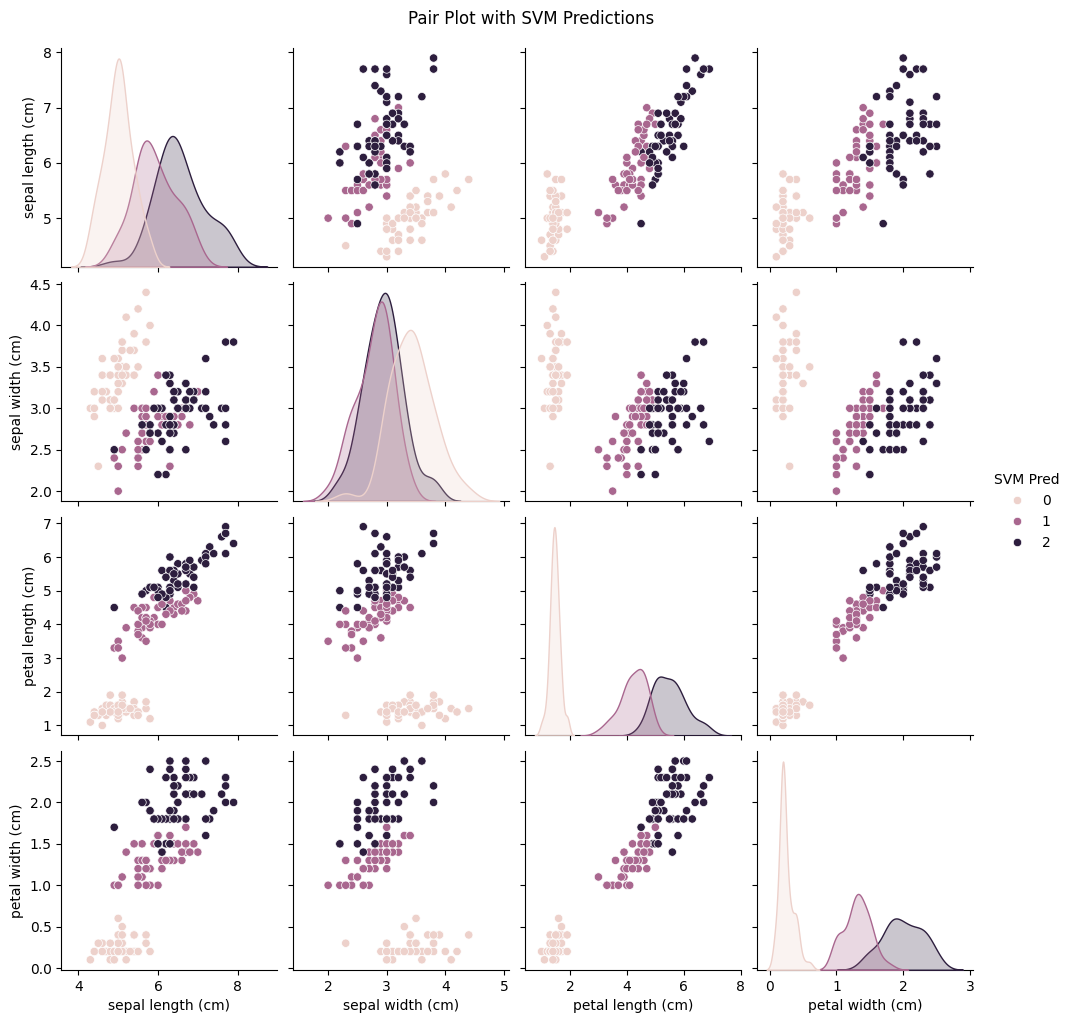


Pair Plot with Logistic Regression Predictions:


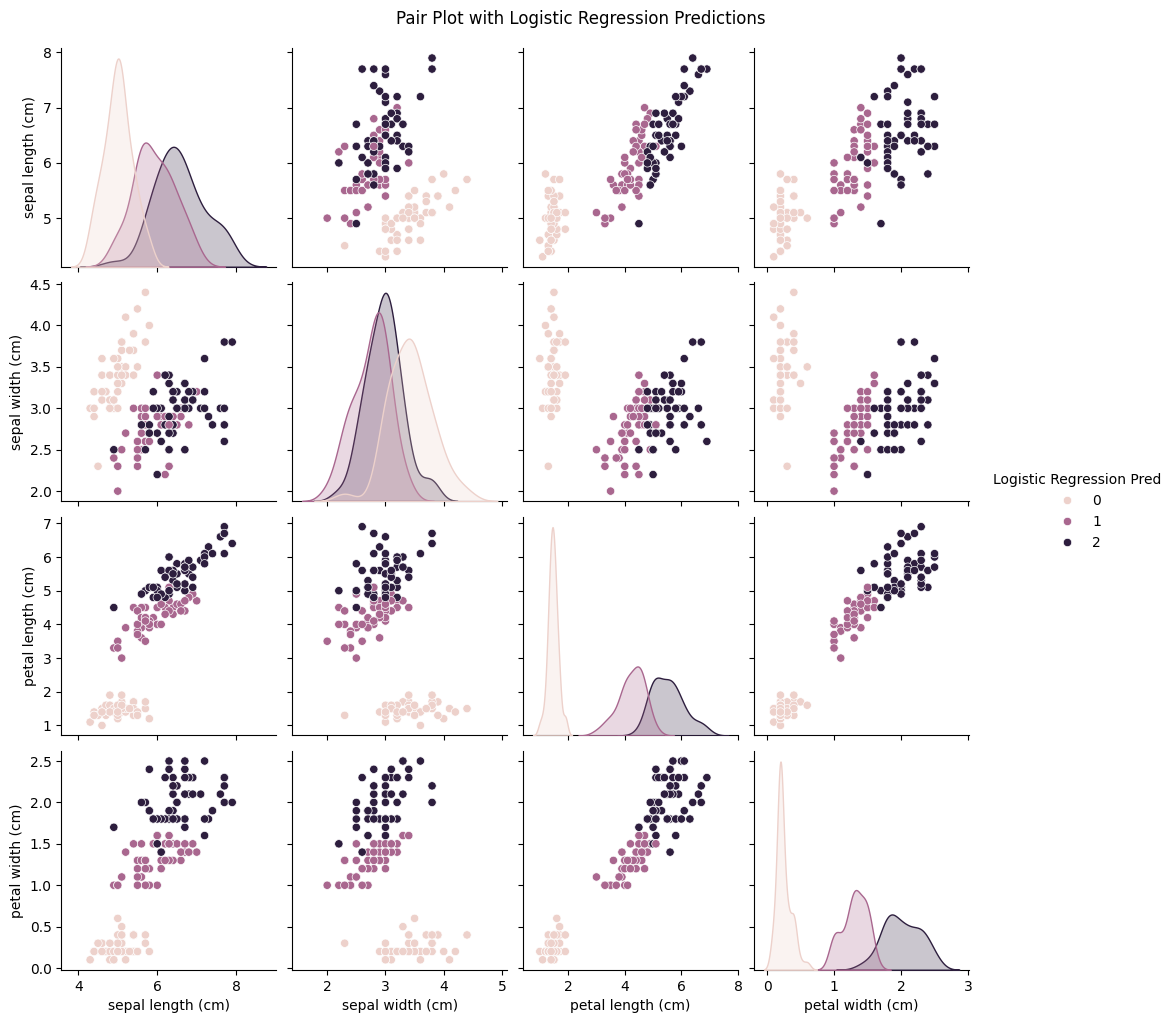


Pair Plot with KNN Predictions:


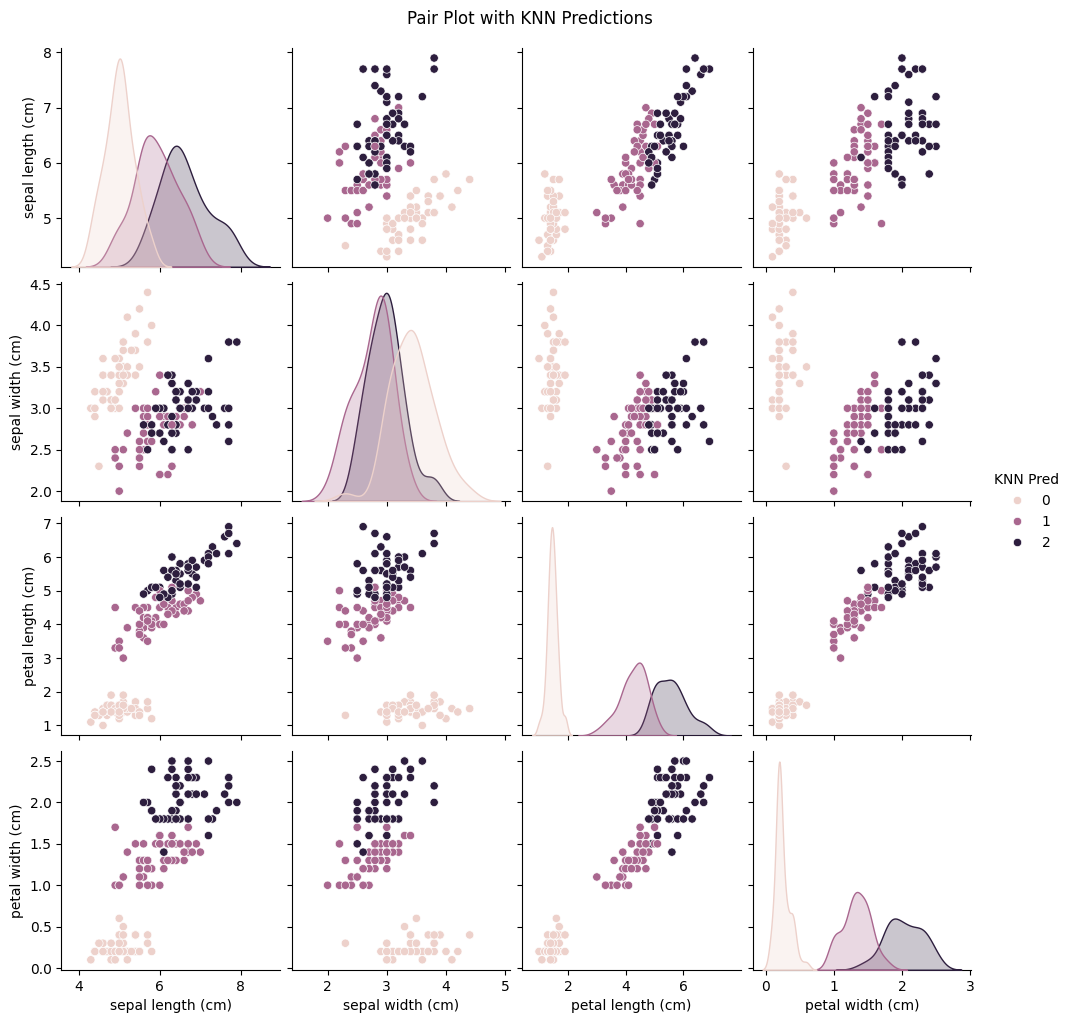


Pair Plot with XGBoost Predictions:


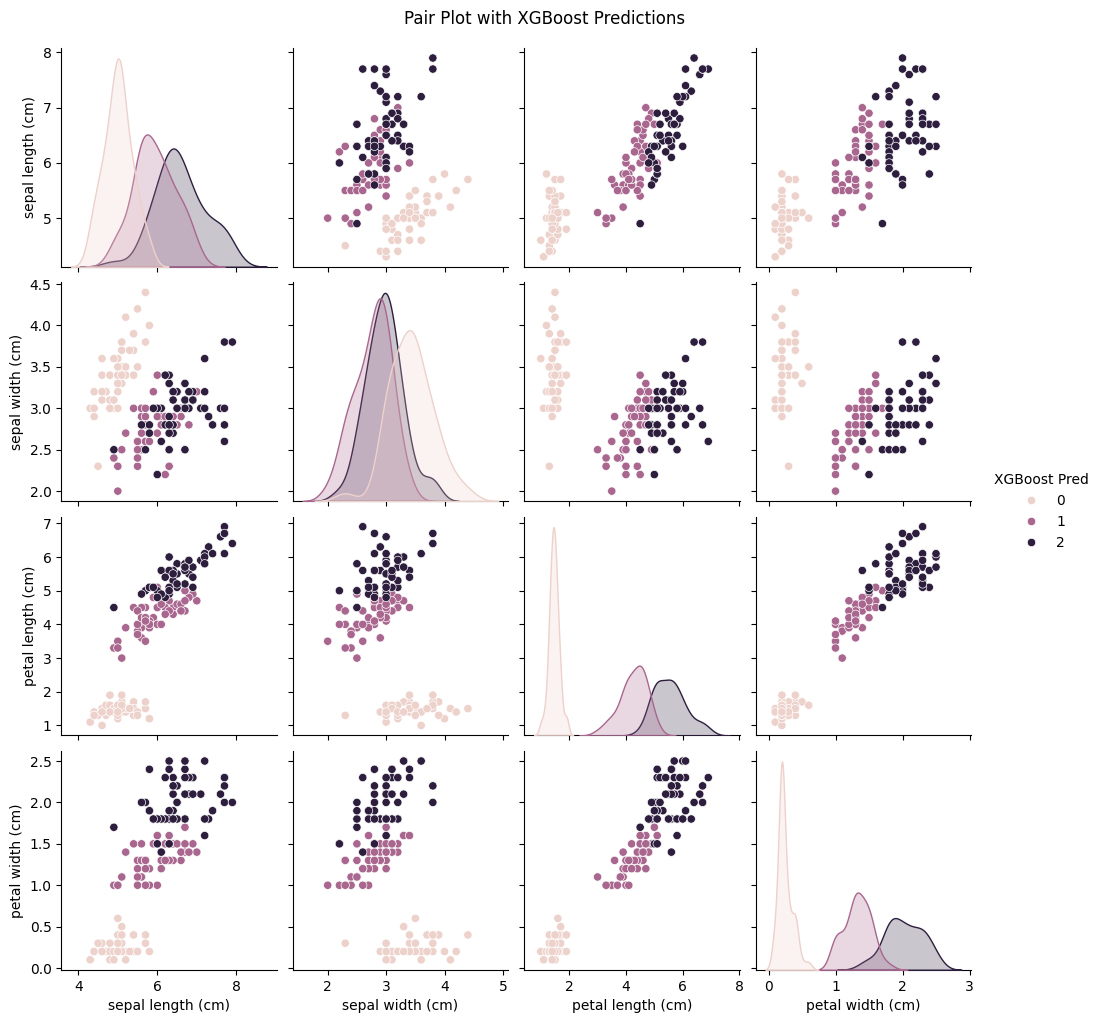

In [19]:
#Visualization
iris_df_pred = iris_df.copy()
iris_df_pred['Random Forest Pred'] = rf_model.predict(X_scaled)
iris_df_pred['SVM Pred'] = svm_model.predict(X_scaled)
iris_df_pred['Logistic Regression Pred'] = lr_model.predict(X_scaled)
iris_df_pred['KNN Pred'] = knn_model.predict(X_scaled)
iris_df_pred['XGBoost Pred'] = xgb_model.predict(X_scaled)
print("\nPair Plot with Random Forest Predictions:")
sns.pairplot(iris_df_pred, hue='Random Forest Pred', vars=iris.feature_names)
plt.suptitle('Pair Plot with Random Forest Predictions', y=1.02)
plt.show()
print("\nPair Plot with SVM Predictions:")
sns.pairplot(iris_df_pred, hue='SVM Pred', vars=iris.feature_names)
plt.suptitle('Pair Plot with SVM Predictions', y=1.02)
plt.show()
print("\nPair Plot with Logistic Regression Predictions:")
sns.pairplot(iris_df_pred, hue='Logistic Regression Pred', vars=iris.feature_names)
plt.suptitle('Pair Plot with Logistic Regression Predictions', y=1.02)
plt.show()
print("\nPair Plot with KNN Predictions:")
sns.pairplot(iris_df_pred, hue='KNN Pred', vars=iris.feature_names)
plt.suptitle('Pair Plot with KNN Predictions', y=1.02)
plt.show()
print("\nPair Plot with XGBoost Predictions:")
sns.pairplot(iris_df_pred, hue='XGBoost Pred', vars=iris.feature_names)
plt.suptitle('Pair Plot with XGBoost Predictions', y=1.02)
plt.show()

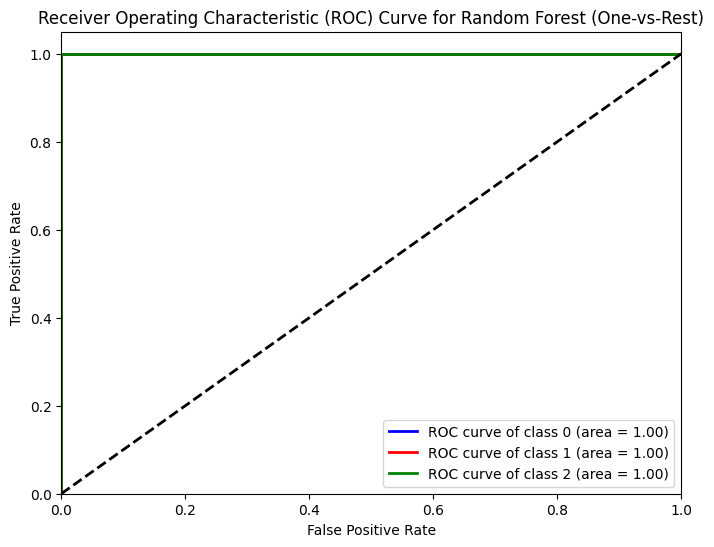

In [21]:
#Best Model
best_model = rf_model
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = best_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()